In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
from statistics import mean, stdev
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) # for displaying all columns

sns.set()



In [2]:
df = pd.read_csv("mdg.csv")

In [3]:
df

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,,,,,,,,,,,,,,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,G,1426.5,NaN,G,1375.1,NaN,G,1320.1,NaN,G,1268.8,NaN,G,1199.1,NaN,G,1114.8,NaN,G,1056.1,NaN,G,832.4,NaN,G,781.1,NaN,G,645.4,NaN,G,894.7,NaN,G,1037.8,NaN,G,957.1,NaN,G,1338.5,NaN,G,1657.5,NaN,G,2280.9,NaN,G,4217.1,NaN,G,6776.6,NaN,G,8470.8,NaN,G,12251.4,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.36,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.46,NaN,C,,,,,,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,28.1,NaN,C,,,,,,,,,,,,,28.5,NaN,C,,,,,,,,,,,,,28.3,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,G,2387.2,NaN,G,2343.2,NaN,G,1928.8,NaN,G,2086.5,NaN,G,2016.9,NaN,G,1543.8,NaN,G,1752.8,NaN,G,2984.9,NaN,G,3021.6,NaN,G,3223.3,NaN,G,3751.3,NaN,G,4294.1,NaN,G,4165.7,NaN,G,4253.7,NaN,G,3865,NaN,G,4477.4,NaN,G,4657.1,NaN,G,4488.4,NaN,G,4415.1,NaN,G,4668.1,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,894,Zambia,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2445.9,NaN,G,2416.6,NaN,G,2456.9,NaN,G,2500.9,NaN,G,2420.2,NaN,G,2170.9,NaN,G,1870.2,NaN,G,2390.9,NaN,G,2313.9,NaN,G,1807.8,NaN,G,1822.5,NaN,G,1906.8,NaN,G,1969.2,NaN,G,2101.2,NaN,G,2126.9,NaN,G,2277.2,NaN,G,2225.9,NaN,G,1914.2,NaN,G,2159.9,NaN,G,2486.2,NaN,G,2673.2,NaN,G,3047.3,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
686,894,Zambia,616,Y,Terrestrial and marine areas protected to tota...,36.05,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,36.06,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,37.85,NaN,C,,,,,,,,,,,,,,,
687,716,Zimbabwe,567,Y,"Proportion of land area covered by forest, per...",57.3,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,48.8,NaN,C,,,,,,,,,,,,,44.6,NaN,C,,,,,,,,,,,,,40.4,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,
688,716,Zimbabwe,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",15504.1,NaN,G,15823.1,NaN,G,16901.2,NaN,G,16208.1,NaN,G,17645.6,NaN,G,15130,NaN,G,14994.4,NaN,G,14407.6,NaN,G,14253.6,NaN,G,15834.1,NaN,G,13886.9,NaN,G,12563.1,NaN,G,11932.4,NaN,G,10627,NaN,G,9864.2,NaN,G,10715,NaN,G,10249.3,NaN,G,9732.2,NaN,G,7682.4,NaN,G,8239.7,NaN,G,9028.2,NaN,G,9860.6,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,


 The Dataframe has 690 rows and 95 Columns

 # MISSING VALUES

In [4]:
#since there are empty cells. they need to be replaced with "NaN" before finding the some of missing values
df1 = df.replace(r'^\s*$', np.nan, regex=True)

df1.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,G,1426.5,NaN,G,1375.1,NaN,G,1320.1,NaN,G,1268.8,NaN,G,1199.1,NaN,G,1114.8,NaN,G,1056.1,NaN,G,832.4,NaN,G,781.1,NaN,G,645.4,NaN,G,894.7,NaN,G,1037.8,NaN,G,957.1,NaN,G,1338.5,NaN,G,1657.5,NaN,G,2280.9,NaN,G,4217.1,NaN,G,6776.6,NaN,G,8470.8,NaN,G,12251.4,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,G,2387.2,NaN,G,2343.2,NaN,G,1928.8,NaN,G,2086.5,NaN,G,2016.9,NaN,G,1543.8,NaN,G,1752.8,NaN,G,2984.9,NaN,G,3021.6,NaN,G,3223.3,NaN,G,3751.3,NaN,G,4294.1,NaN,G,4165.7,NaN,G,4253.7,NaN,G,3865,NaN,G,4477.4,NaN,G,4657.1,NaN,G,4488.4,NaN,G,4415.1,NaN,G,4668.1,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dealing with mising values
null_columns=df1.columns[df1.isnull().any()]
df1[null_columns].isnull().sum().sort_values(ascending=False).head(50)

Type.29         690
Footnotes.18    690
Footnotes.14    690
Footnotes.1     690
Footnotes.21    690
Footnotes.9     690
Footnotes.2     690
Footnotes.19    690
Footnotes.8     690
Footnotes.3     690
Footnotes.11    690
Type.22         690
Footnotes.7     690
Footnotes.17    690
Footnotes.4     690
Footnotes.12    690
Footnotes.16    690
Footnotes.13    690
Footnotes.5     690
Footnotes.6     690
Footnotes.22    690
2012            690
2013            690
Footnotes.23    690
2019            690
Type.28         690
Footnotes.28    690
2018            690
Type.27         690
Footnotes.27    690
2017            690
Type.26         690
Footnotes.26    690
2016            690
Type.25         690
Footnotes.25    690
2015            690
Footnotes.24    690
Type.23         690
Footnotes.29    690
Footnotes.10    685
Footnotes       685
Footnotes.20    685
Footnotes.15    685
Type.1          508
1991            508
1993            486
Type.3          486
1992            486
Type.2          486


In [6]:
#since we have columns with 690 missing value, it means there is no data available along the columns.. therefore all columns with 690 missing values should be dropped
df2 = df1.dropna(how='all', axis='columns')
df2.head() 

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Type.1,1992,Type.2,1993,Type.3,1994,Type.4,1995,Type.5,1996,Type.6,1997,Type.7,1998,Type.8,1999,Type.9,2000,Footnotes.10,Type.10,2001,Type.11,2002,Type.12,2003,Type.13,2004,Type.14,2005,Footnotes.15,Type.15,2006,Type.16,2007,Type.17,2008,Type.18,2009,Type.19,2010,Footnotes.20,Type.20,2011,Type.21,2014,Type.24
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,G,1426.5,G,1375.1,G,1320.1,G,1268.8,G,1199.1,G,1114.8,G,1056.1,G,832.4,G,781.1,NaN,G,645.4,G,894.7,G,1037.8,G,957.1,G,1338.5,NaN,G,1657.5,G,2280.9,G,4217.1,G,6776.6,G,8470.8,NaN,G,12251.4,G,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,C
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,NaN,C,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,G,2387.2,G,2343.2,G,1928.8,G,2086.5,G,2016.9,G,1543.8,G,1752.8,G,2984.9,G,3021.6,NaN,G,3223.3,G,3751.3,G,4294.1,G,4165.7,G,4253.7,NaN,G,3865,G,4477.4,G,4657.1,G,4488.4,G,4415.1,NaN,G,4668.1,G,NaN,NaN


In [7]:
list(df2.columns)


['CountryCode',
 'Country',
 'SeriesCode',
 'MDG',
 'Series',
 '1990',
 'Footnotes',
 'Type',
 '1991',
 'Type.1',
 '1992',
 'Type.2',
 '1993',
 'Type.3',
 '1994',
 'Type.4',
 '1995',
 'Type.5',
 '1996',
 'Type.6',
 '1997',
 'Type.7',
 '1998',
 'Type.8',
 '1999',
 'Type.9',
 '2000',
 'Footnotes.10',
 'Type.10',
 '2001',
 'Type.11',
 '2002',
 'Type.12',
 '2003',
 'Type.13',
 '2004',
 'Type.14',
 '2005',
 'Footnotes.15',
 'Type.15',
 '2006',
 'Type.16',
 '2007',
 'Type.17',
 '2008',
 'Type.18',
 '2009',
 'Type.19',
 '2010',
 'Footnotes.20',
 'Type.20',
 '2011',
 'Type.21',
 '2014',
 'Type.24']

In [8]:
# New Dataframe missing values
null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum().sort_values(ascending=False).head(50)

Footnotes       685
Footnotes.20    685
Footnotes.10    685
Footnotes.15    685
Type.1          508
1991            508
Type.2          486
1993            486
Type.3          486
1992            486
1994            485
Type.4          485
Type.6          484
1996            484
Type.5          483
1995            483
Type.8          481
1999            481
Type.9          481
Type.7          481
1997            481
1998            481
Type.11         479
2001            479
2002            478
Type.12         478
2003            478
2004            478
Type.14         478
Type.13         478
2006            476
Type.16         476
2007            475
Type.17         475
2008            475
Type.18         475
2009            475
Type.19         475
2011            475
Type.21         475
Type.24         467
2014            467
2005            254
Type.15         253
2010            252
Type.20         251
1990             63
Type             62
2000             34
Type.10          33


In [9]:
#droping Footnote columns to have consistancy in the data
df2.drop(['Footnotes','Footnotes.10','Footnotes.15','Footnotes.20'], axis='columns', inplace=True)


In [10]:
list(df2.columns)


['CountryCode',
 'Country',
 'SeriesCode',
 'MDG',
 'Series',
 '1990',
 'Type',
 '1991',
 'Type.1',
 '1992',
 'Type.2',
 '1993',
 'Type.3',
 '1994',
 'Type.4',
 '1995',
 'Type.5',
 '1996',
 'Type.6',
 '1997',
 'Type.7',
 '1998',
 'Type.8',
 '1999',
 'Type.9',
 '2000',
 'Type.10',
 '2001',
 'Type.11',
 '2002',
 'Type.12',
 '2003',
 'Type.13',
 '2004',
 'Type.14',
 '2005',
 'Type.15',
 '2006',
 'Type.16',
 '2007',
 'Type.17',
 '2008',
 'Type.18',
 '2009',
 'Type.19',
 '2010',
 'Type.20',
 '2011',
 'Type.21',
 '2014',
 'Type.24']

,yr_1990
Country,
Afghanistan,2.12676.90.36
Albania,28.874880.15
Algeria,0.778924.85.97
Angola,48.94429.74.97
Antigua and Barbuda,22.7300.70.02
...,...
Venezuela,59122162.426.9
Viet Nam,30.221407.91.58
Yemen,1-2999.60


In [37]:
df3.plot.bar()

TypeError: no numeric data to plot

In [19]:
df["Country"].value_counts()

Gabon                        3
Liberia                      3
Kazakhstan                   3
Turkmenistan                 3
Wallis and Futuna Islands    3
                            ..
Saint Lucia                  3
Lesotho                      3
Lithuania                    3
Senegal                      3
Mexico                       3
Name: Country, Length: 230, dtype: int64

In [19]:
df1=df.groupby(['SeriesCode'])
df1

In [20]:
df['SeriesCode'].unique()

array([567, 749, 616], dtype=int64)

In [14]:
filtered_data = df.dropna(axis='columns', how='all')



In [31]:
df['Type'].value_counts()

C    406
G    181
      62
E     41
Name: Type, dtype: int64

In [22]:
df.replace('', np.nan, inplace=True)


In [41]:
df.head(30)

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,,,,,,,,,,,,,,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,G,1426.5,NaN,G,1375.1,NaN,G,1320.1,NaN,G,1268.8,NaN,G,1199.1,NaN,G,1114.8,NaN,G,1056.1,NaN,G,832.4,NaN,G,781.1,NaN,G,645.4,NaN,G,894.7,NaN,G,1037.8,NaN,G,957.1,NaN,G,1338.5,NaN,G,1657.5,NaN,G,2280.9,NaN,G,4217.1,NaN,G,6776.6,NaN,G,8470.8,NaN,G,12251.4,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.36,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.46,NaN,C,,,,,,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,28.1,NaN,C,,,,,,,,,,,,,28.5,NaN,C,,,,,,,,,,,,,28.3,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,G,2387.2,NaN,G,2343.2,NaN,G,1928.8,NaN,G,2086.5,NaN,G,2016.9,NaN,G,1543.8,NaN,G,1752.8,NaN,G,2984.9,NaN,G,3021.6,NaN,G,3223.3,NaN,G,3751.3,NaN,G,4294.1,NaN,G,4165.7,NaN,G,4253.7,NaN,G,3865,NaN,G,4477.4,NaN,G,4657.1,NaN,G,4488.4,NaN,G,4415.1,NaN,G,4668.1,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
5,8,Albania,616,Y,Terrestrial and marine areas protected to tota...,0.15,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.48,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.91,NaN,C,,,,,,,,,,,,,,,
6,12,Algeria,567,Y,"Proportion of land area covered by forest, per...",0.7,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.7,NaN,C,,,,,,,,,,,,,0.6,NaN,C,,,,,,,,,,,,,0.6,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,12,Algeria,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",78924.8,NaN,G,81220.4,NaN,G,81935.4,NaN,G,82294.8,NaN,G,86500.9,NaN,G,95345.7,NaN,G,97131.5,NaN,G,88195,NaN,G,107080.1,NaN,G,92118.7,NaN,G,87931,NaN,G,84293.3,NaN,G,90853.6,NaN,G,92533.1,NaN,G,89493.1,NaN,G,107127.7,NaN,G,100919.5,NaN,G,109294.9,NaN,G,111575.8,NaN,G,121374,NaN,G,119276.5,NaN,G,121755.4,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
8,12,Algeria,616,Y,Terrestrial and marine areas protected to tota...,5.97,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,5.98,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7.46,NaN,C,,,,,,,,,,,,,,,
9,16,American Samoa,567,Y,"Proportion of land area covered by forest, per...",90,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,90,NaN,C,,,,,,,,,,,,,90,NaN,C,,,,,,,,,,,,,90,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [26]:
df2=df.dropna(axis=0,how='all')

In [40]:
df['Type'].value_counts()

C    406
G    181
      62
E     41
Name: Type, dtype: int64

In [15]:
df2.head(20)

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,G,1426.5,NaN,G,1375.1,NaN,G,1320.1,NaN,G,1268.8,NaN,G,1199.1,NaN,G,1114.8,NaN,G,1056.1,NaN,G,832.4,NaN,G,781.1,NaN,G,645.4,NaN,G,894.7,NaN,G,1037.8,NaN,G,957.1,NaN,G,1338.5,NaN,G,1657.5,NaN,G,2280.9,NaN,G,4217.1,NaN,G,6776.6,NaN,G,8470.8,NaN,G,12251.4,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,G,2387.2,NaN,G,2343.2,NaN,G,1928.8,NaN,G,2086.5,NaN,G,2016.9,NaN,G,1543.8,NaN,G,1752.8,NaN,G,2984.9,NaN,G,3021.6,NaN,G,3223.3,NaN,G,3751.3,NaN,G,4294.1,NaN,G,4165.7,NaN,G,4253.7,NaN,G,3865,NaN,G,4477.4,NaN,G,4657.1,NaN,G,4488.4,NaN,G,4415.1,NaN,G,4668.1,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8,Albania,616,Y,Terrestrial and marine areas protected to tota...,0.15,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.91,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12,Algeria,567,Y,"Proportion of land area covered by forest, per...",0.7,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12,Algeria,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",78924.8,NaN,G,81220.4,NaN,G,81935.4,NaN,G,82294.8,NaN,G,86500.9,NaN,G,95345.7,NaN,G,97131.5,NaN,G,881

In [31]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
   

In [32]:
df[df['2015'].notnull()]

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,,,,,,,,,,,,,,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,G,1426.5,NaN,G,1375.1,NaN,G,1320.1,NaN,G,1268.8,NaN,G,1199.1,NaN,G,1114.8,NaN,G,1056.1,NaN,G,832.4,NaN,G,781.1,NaN,G,645.4,NaN,G,894.7,NaN,G,1037.8,NaN,G,957.1,NaN,G,1338.5,NaN,G,1657.5,NaN,G,2280.9,NaN,G,4217.1,NaN,G,6776.6,NaN,G,8470.8,NaN,G,12251.4,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.36,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.46,NaN,C,,,,,,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,28.1,NaN,C,,,,,,,,,,,,,28.5,NaN,C,,,,,,,,,,,,,28.3,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,G,2387.2,NaN,G,2343.2,NaN,G,1928.8,NaN,G,2086.5,NaN,G,2016.9,NaN,G,1543.8,NaN,G,1752.8,NaN,G,2984.9,NaN,G,3021.6,NaN,G,3223.3,NaN,G,3751.3,NaN,G,4294.1,NaN,G,4165.7,NaN,G,4253.7,NaN,G,3865,NaN,G,4477.4,NaN,G,4657.1,NaN,G,4488.4,NaN,G,4415.1,NaN,G,4668.1,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,894,Zambia,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2445.9,NaN,G,2416.6,NaN,G,2456.9,NaN,G,2500.9,NaN,G,2420.2,NaN,G,2170.9,NaN,G,1870.2,NaN,G,2390.9,NaN,G,2313.9,NaN,G,1807.8,NaN,G,1822.5,NaN,G,1906.8,NaN,G,1969.2,NaN,G,2101.2,NaN,G,2126.9,NaN,G,2277.2,NaN,G,2225.9,NaN,G,1914.2,NaN,G,2159.9,NaN,G,2486.2,NaN,G,2673.2,NaN,G,3047.3,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
686,894,Zambia,616,Y,Terrestrial and marine areas protected to tota...,36.05,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,36.06,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,37.85,NaN,C,,,,,,,,,,,,,,,
687,716,Zimbabwe,567,Y,"Proportion of land area covered by forest, per...",57.3,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,48.8,NaN,C,,,,,,,,,,,,,44.6,NaN,C,,,,,,,,,,,,,40.4,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,
688,716,Zimbabwe,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",15504.1,NaN,G,15823.1,NaN,G,16901.2,NaN,G,16208.1,NaN,G,17645.6,NaN,G,15130,NaN,G,14994.4,NaN,G,14407.6,NaN,G,14253.6,NaN,G,15834.1,NaN,G,13886.9,NaN,G,12563.1,NaN,G,11932.4,NaN,G,10627,NaN,G,9864.2,NaN,G,10715,NaN,G,10249.3,NaN,G,9732.2,NaN,G,7682.4,NaN,G,8239.7,NaN,G,9028.2,NaN,G,9860.6,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,


In [33]:
df['Country'].nunique()

230

In [34]:
df['MDG'].nunique()

1

In [38]:
df['Series'].value_counts()

Proportion of land area covered by forest, percentage                           230
Terrestrial and marine areas protected to total territorial area, percentage    230
Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)             230
Name: Series, dtype: int64

In [39]:
df['Type'].value_counts()

C    406
G    181
      62
E     41
Name: Type, dtype: int64

In [44]:
df.groupby('Country').apply(lambda x: x.isnull().sum().sum())

Country
Afghanistan                                       29
Albania                                           29
Algeria                                           29
American Samoa                                     7
Andorra                                           24
                                                  ..
Western Sahara                                     7
Yemen                                             29
Yugoslavia [former Socialist Federal Republic]     2
Zambia                                            29
Zimbabwe                                          29
Length: 230, dtype: int64

In [13]:
df2 = df.replace(r'^\s*$', np.nan, regex=True)
df2.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,G,1426.5,NaN,G,1375.1,NaN,G,1320.1,NaN,G,1268.8,NaN,G,1199.1,NaN,G,1114.8,NaN,G,1056.1,NaN,G,832.4,NaN,G,781.1,NaN,G,645.4,NaN,G,894.7,NaN,G,1037.8,NaN,G,957.1,NaN,G,1338.5,NaN,G,1657.5,NaN,G,2280.9,NaN,G,4217.1,NaN,G,6776.6,NaN,G,8470.8,NaN,G,12251.4,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,G,2387.2,NaN,G,2343.2,NaN,G,1928.8,NaN,G,2086.5,NaN,G,2016.9,NaN,G,1543.8,NaN,G,1752.8,NaN,G,2984.9,NaN,G,3021.6,NaN,G,3223.3,NaN,G,3751.3,NaN,G,4294.1,NaN,G,4165.7,NaN,G,4253.7,NaN,G,3865,NaN,G,4477.4,NaN,G,4657.1,NaN,G,4488.4,NaN,G,4415.1,NaN,G,4668.1,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
null_columns=df.columns[df2.isnull().any()]
df2[null_columns].isnull().sum().sum()

49804

In [69]:
#missing values by country

df2.groupby('Country').apply(lambda x: x.isnull().sum().sum())

Country
Afghanistan                                       212
Albania                                           212
Algeria                                           212
American Samoa                                    256
Andorra                                           222
                                                 ... 
Western Sahara                                    256
Yemen                                             212
Yugoslavia [former Socialist Federal Republic]    266
Zambia                                            212
Zimbabwe                                          212
Length: 230, dtype: int64

In [12]:
null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum().sort_values(ascending=False).head(50)

Type.29         690
Footnotes.18    690
Footnotes.14    690
Footnotes.1     690
Footnotes.21    690
Footnotes.9     690
Footnotes.2     690
Footnotes.19    690
Footnotes.8     690
Footnotes.3     690
Footnotes.11    690
Type.22         690
Footnotes.7     690
Footnotes.17    690
Footnotes.4     690
Footnotes.12    690
Footnotes.16    690
Footnotes.13    690
Footnotes.5     690
Footnotes.6     690
Footnotes.22    690
2012            690
2013            690
Footnotes.23    690
2019            690
Type.28         690
Footnotes.28    690
2018            690
Type.27         690
Footnotes.27    690
2017            690
Type.26         690
Footnotes.26    690
2016            690
Type.25         690
Footnotes.25    690
2015            690
Footnotes.24    690
Type.23         690
Footnotes.29    690
Footnotes.10    685
Footnotes       685
Footnotes.20    685
Footnotes.15    685
Type.1          508
1991            508
1993            486
Type.3          486
1992            486
Type.2          486


In [56]:
df3 = df.iloc[df.isnull().sum(1).sort_values(ascending=False).index]
df3

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
61,84,Belize,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",311.7,NaN,G,359.4,NaN,G,355.7,NaN,G,377.7,NaN,G,374,NaN,G,377.7,NaN,G,308,NaN,G,388.7,NaN,G,370.4,NaN,G,601.4,NaN,G,689.4,NaN,G,711.4,NaN,G,366.7,NaN,G,385,NaN,G,396,NaN,G,414.4,NaN,G,432.7,NaN,G,458.4,NaN,G,451,NaN,G,469.4,NaN,G,553.7,NaN,G,550.1,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
388,484,Mexico,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",314291.2,NaN,G,326374,NaN,G,328698.9,NaN,G,330448,NaN,G,348134,NaN,G,328291.8,NaN,G,341482,NaN,G,359047,NaN,G,374063.3,NaN,G,382607.4,NaN,G,382508.4,NaN,G,395636.3,NaN,G,391859.3,NaN,G,405918.6,NaN,G,411767.4,NaN,G,435437.9,NaN,G,445291.1,NaN,G,458866.4,NaN,G,474491.5,NaN,G,450575.3,NaN,G,445063.8,NaN,G,466548.7,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
361,458,Malaysia,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",56592.8,NaN,G,68591.2,NaN,G,75298.2,NaN,G,91722.7,NaN,G,94010.9,NaN,G,121132,NaN,G,125374.7,NaN,G,124821,NaN,G,114186.7,NaN,G,107934.5,NaN,G,126603.2,NaN,G,136716.8,NaN,G,135129,NaN,G,160266.2,NaN,G,167332.5,NaN,G,177372.8,NaN,G,170647.5,NaN,G,188124.4,NaN,G,208237.9,NaN,G,203951.2,NaN,G,224589.1,NaN,G,225692.8,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
286,368,Iraq,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",52555.4,NaN,G,47421.6,NaN,G,61671.6,NaN,G,66801.7,NaN,G,75045.2,NaN,G,77901.7,NaN,G,69500.7,NaN,G,68308.9,NaN,G,72371.9,NaN,G,72283.9,NaN,G,72445.3,NaN,G,85342.1,NaN,G,87259.9,NaN,G,91117.6,NaN,G,114084,NaN,G,113523,NaN,G,98770.6,NaN,G,62155.7,NaN,G,93149.1,NaN,G,104296.8,NaN,G,111447.5,NaN,G,133654.8,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
58,56,Belgium,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",106049.6,NaN,G,110959.8,NaN,G,111968.2,NaN,G,107652.1,NaN,G,112334.9,NaN,G,112327.5,NaN,G,118059.1,NaN,G,115341.8,NaN,G,118374.4,NaN,G,115085.1,NaN,G,114894.4,NaN,G,114315.1,NaN,G,107098.4,NaN,G,114564.4,NaN,G,110908.4,NaN,G,108297.5,NaN,G,106775.7,NaN,G,103215,NaN,G,103882.4,NaN,G,104021.8,NaN,G,109093.3,NaN,G,97765.9,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,891,Serbia and Montenegro,567,Y,"Proportion of land area covered by forest, per...",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
250,316,Guam,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,156,China,567,Y,"Proportion of land area covered by forest, per...",16.7,1,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,18.8,1,C,,,,,,,,,,,,,20.5,1,C,,,,,,,,,,,,,21.9,1,C,,,,,,,,,,,,,,,,,,,,,,,,,,,
634,798,Tuvalu,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [68]:
df2['Footnotes'].value_counts()    

4    2
2    1
1    1
3    1
Name: Footnotes, dtype: int64

In [66]:
 df2.dropna() 

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29


In [73]:
df3=df2.dropna(axis=0, how='all', inplace=True)

In [75]:
df4 = df2.dropna(how='all', axis=1)

In [76]:
df4

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Type.1,1992,Type.2,1993,Type.3,1994,Type.4,1995,Type.5,1996,Type.6,1997,Type.7,1998,Type.8,1999,Type.9,2000,Footnotes.10,Type.10,2001,Type.11,2002,Type.12,2003,Type.13,2004,Type.14,2005,Footnotes.15,Type.15,2006,Type.16,2007,Type.17,2008,Type.18,2009,Type.19,2010,Footnotes.20,Type.20,2011,Type.21,2014,Type.24
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,G,1426.5,G,1375.1,G,1320.1,G,1268.8,G,1199.1,G,1114.8,G,1056.1,G,832.4,G,781.1,NaN,G,645.4,G,894.7,G,1037.8,G,957.1,G,1338.5,NaN,G,1657.5,G,2280.9,G,4217.1,G,6776.6,G,8470.8,NaN,G,12251.4,G,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,C
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,NaN,C,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,G,2387.2,G,2343.2,G,1928.8,G,2086.5,G,2016.9,G,1543.8,G,1752.8,G,2984.9,G,3021.6,NaN,G,3223.3,G,3751.3,G,4294.1,G,4165.7,G,4253.7,NaN,G,3865,G,4477.4,G,4657.1,G,4488.4,G,4415.1,NaN,G,4668.1,G,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,894,Zambia,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2445.9,NaN,G,2416.6,G,2456.9,G,2500.9,G,2420.2,G,2170.9,G,1870.2,G,2390.9,G,2313.9,G,1807.8,G,1822.5,NaN,G,1906.8,G,1969.2,G,2101.2,G,2126.9,G,2277.2,NaN,G,2225.9,G,1914.2,G,2159.9,G,2486.2,G,2673.2,NaN,G,3047.3,G,NaN,NaN
686,894,Zambia,616,Y,Terrestrial and marine areas protected to tota...,36.05,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.06,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.85,C
687,716,Zimbabwe,567,Y,"Proportion of land area covered by forest, per...",57.3,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.8,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.6,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.4,NaN,C,NaN,NaN,NaN,NaN
688,716,Zimbabwe,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",15504.1,NaN,G,15823.1,G,16901.2,G,16208.1,G,17645.6,G,15130,G,14994.4,G,14407.6,G,14253.6,G,15834.1,G,13886.9,NaN,G,12563.1,G,11932.4,G,10627,G,9864.2,G,10715,NaN,G,10249.3,G,9732.2,G,7682.4,G,8239.7,G,9028.2,NaN,G,9860.6,G,NaN,NaN


In [65]:
 df7 = df.loc[:, ('Country','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014')]
df7

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,2.1,,,,,,,,,,2.1,,,,,2.1,,,,,2.1,,,,
1,Afghanistan,2676.9,2493.6,1426.5,1375.1,1320.1,1268.8,1199.1,1114.8,1056.1,832.4,781.1,645.4,894.7,1037.8,957.1,1338.5,1657.5,2280.9,4217.1,6776.6,8470.8,12251.4,,,
2,Afghanistan,0.36,,,,,,,,,,0.36,,,,,,,,,,,,,,0.46
3,Albania,28.8,,,,,,,,,,28.1,,,,,28.5,,,,,28.3,,,,
4,Albania,7488,3971.4,2387.2,2343.2,1928.8,2086.5,2016.9,1543.8,1752.8,2984.9,3021.6,3223.3,3751.3,4294.1,4165.7,4253.7,3865,4477.4,4657.1,4488.4,4415.1,4668.1,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Zambia,2445.9,2416.6,2456.9,2500.9,2420.2,2170.9,1870.2,2390.9,2313.9,1807.8,1822.5,1906.8,1969.2,2101.2,2126.9,2277.2,2225.9,1914.2,2159.9,2486.2,2673.2,3047.3,,,
686,Zambia,36.05,,,,,,,,,,36.06,,,,,,,,,,,,,,37.85
687,Zimbabwe,57.3,,,,,,,,,,48.8,,,,,44.6,,,,,40.4,,,,
688,Zimbabwe,15504.1,15823.1,16901.2,16208.1,17645.6,15130,14994.4,14407.6,14253.6,15834.1,13886.9,12563.1,11932.4,10627,9864.2,10715,10249.3,9732.2,7682.4,8239.7,9028.2,9860.6,,,


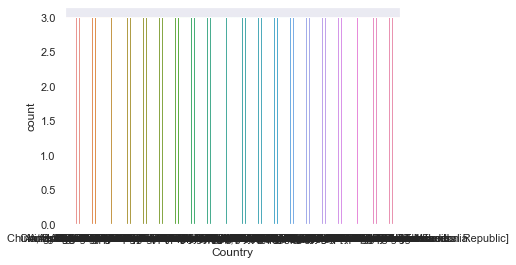

In [68]:
sns.countplot(x = 'Country', data = df7)

In [67]:
year['Country'] = df['Country']


In [52]:
year

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Country
0,2.1,,,,,,,,,,2.1,,,,,2.1,,,,,2.1,,,,,Afghanistan
1,2676.9,2493.6,1426.5,1375.1,1320.1,1268.8,1199.1,1114.8,1056.1,832.4,781.1,645.4,894.7,1037.8,957.1,1338.5,1657.5,2280.9,4217.1,6776.6,8470.8,12251.4,,,,Afghanistan
2,0.36,,,,,,,,,,0.36,,,,,,,,,,,,,,0.46,Afghanistan
3,28.8,,,,,,,,,,28.1,,,,,28.5,,,,,28.3,,,,,Albania
4,7488,3971.4,2387.2,2343.2,1928.8,2086.5,2016.9,1543.8,1752.8,2984.9,3021.6,3223.3,3751.3,4294.1,4165.7,4253.7,3865,4477.4,4657.1,4488.4,4415.1,4668.1,,,,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2445.9,2416.6,2456.9,2500.9,2420.2,2170.9,1870.2,2390.9,2313.9,1807.8,1822.5,1906.8,1969.2,2101.2,2126.9,2277.2,2225.9,1914.2,2159.9,2486.2,2673.2,3047.3,,,,Zambia
686,36.05,,,,,,,,,,36.06,,,,,,,,,,,,,,37.85,Zambia
687,57.3,,,,,,,,,,48.8,,,,,44.6,,,,,40.4,,,,,Zimbabwe
688,15504.1,15823.1,16901.2,16208.1,17645.6,15130,14994.4,14407.6,14253.6,15834.1,13886.9,12563.1,11932.4,10627,9864.2,10715,10249.3,9732.2,7682.4,8239.7,9028.2,9860.6,,,,Zimbabwe


In [57]:
year = pd.melt(year, id_vars = ['Country'], var_name='count')

In [59]:
year = year[year['']]

KeyError: "None of [Index(['1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990',\n       '1990',\n       ...\n       '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014',\n       '2014'],\n      dtype='object', length=17250)] are in the [columns]"